In [1]:
# -----------------------------------------
# House Price Prediction
# -----------------------------------------

In [ ]:

# 1) Import required libraries
import pandas as pd                      # for tables / data frames
import seaborn as sns                    # for nice plots
import matplotlib.pyplot as plt          # for plotting
from sklearn.datasets import fetch_california_housing  # built-in dataset
from sklearn.model_selection import train_test_split   # to split data
from sklearn.linear_model import LinearRegression     # simple model


In [2]:
# 2) Load the dataset into a pandas DataFrame
cal = fetch_california_housing(as_frame=True)  # load data as a DataFrame
df = cal.frame                                 # df now holds features + target
# Target column name: 'MedHouseVal' (median house value for block)


In [4]:
# 3) Quick look at the data (first rows)
print("First 5 rows:")
df.head()       # show top rows so we see columns and values

First 5 rows:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
# 4) Basic information and stats (helps to know if any missing values)
print("\nData info:")
df.info()

print("\nSummary statistics:")
df.describe()   # mean, std, min, max for each column



Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB

Summary statistics:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


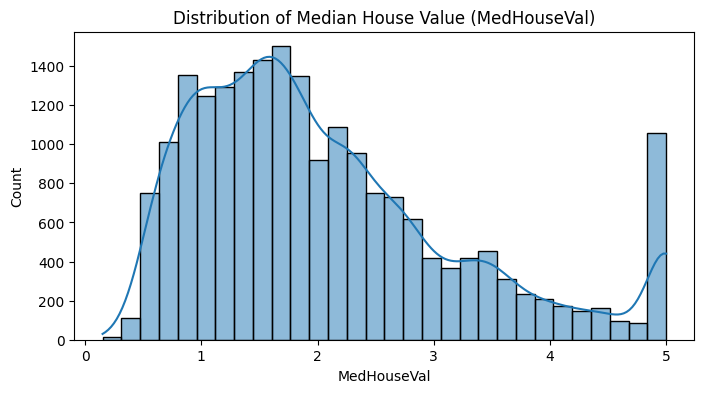

In [7]:
# 5) Simple visualization: distribution of the target (house value)
plt.figure(figsize=(8,4))
sns.histplot(df['MedHouseVal'], bins=30, kde=True)
plt.title("Distribution of Median House Value (MedHouseVal)")
plt.xlabel("MedHouseVal")
plt.show()


In [9]:
# 7) Grouping example: average house value by income bins (simple analysis)
# Create 5 bins of median income (low -> high)
df['inc_bin'] = pd.qcut(df['MedInc'], 5, labels=["VeryLow","Low","Medium","High","VeryHigh"])
avg_by_income = df.groupby('inc_bin')['MedHouseVal'].mean().reset_index()
print("\nAverage house value by income bin:")
avg_by_income


Average house value by income bin:


C:\Users\syeda\AppData\Local\Temp\ipykernel_7976\2090681347.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_by_income = df.groupby('inc_bin')['MedHouseVal'].mean().reset_index()


,inc_bin,MedHouseVal
0,VeryLow,1.184027
1,Low,1.570300
2,Medium,1.938895
3,High,2.300291
4,VeryHigh,3.349910


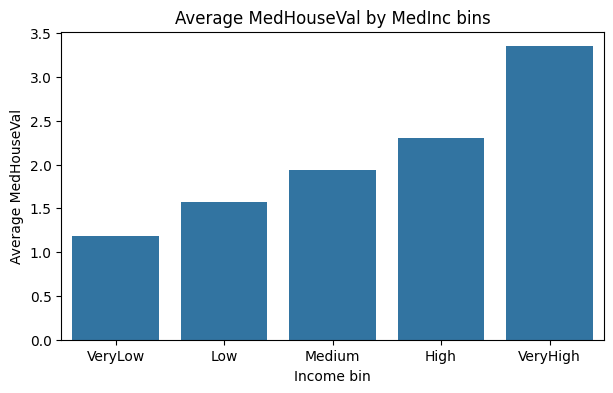

In [10]:
# Plot the grouped averages
plt.figure(figsize=(7,4))
sns.barplot(data=avg_by_income, x='inc_bin', y='MedHouseVal', order=["VeryLow","Low","Medium","High","VeryHigh"])
plt.title("Average MedHouseVal by MedInc bins")
plt.xlabel("Income bin")
plt.ylabel("Average MedHouseVal")
plt.show()


In [11]:
# 8) Prepare features (X) and target (y)
# We choose a simple set of numeric columns (no categorical here)
features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
X = df[features]            # inputs for the model
y = df['MedHouseVal']       # what we want to predict


In [12]:
# 9) Split into training and testing sets
# 80% training, 20% testing. random_state ensures the same split each run.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [13]:
# 10) Create and train a simple Linear Regression model
model = LinearRegression()   # simple linear model
model.fit(X_train, y_train)  # learn from training data


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:

# 11) Predict on the test set
y_pred = model.predict(X_test)


In [15]:
# 12) Show a small table comparing actual vs predicted (first 10 rows)
comp = pd.DataFrame({"Actual": y_test.values, "Predicted": y_pred})
print("\nFirst 10 Actual vs Predicted:")
print(comp.head(10))




First 10 Actual vs Predicted:
    Actual  Predicted
0  0.47700   0.719123
1  0.45800   1.764017
2  5.00001   2.709659
3  2.18600   2.838926
4  2.78000   2.604657
5  1.58700   2.011754
6  1.98200   2.645500
7  1.57500   2.168755
8  3.40000   2.740746
9  4.46600   3.915615


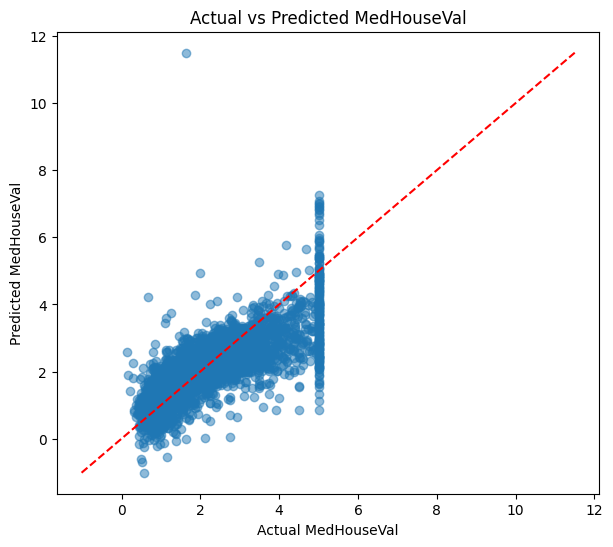

In [ ]:

# 13) Scatter plot of Actual vs Predicted values (visual check)
plt.figure(figsize=(7,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual MedHouseVal")
plt.ylabel("Predicted MedHouseVal")
plt.title("Actual vs Predicted MedHouseVal")
# plot the perfect prediction line y=x for reference
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, linestyle='--', color='red')
plt.show()

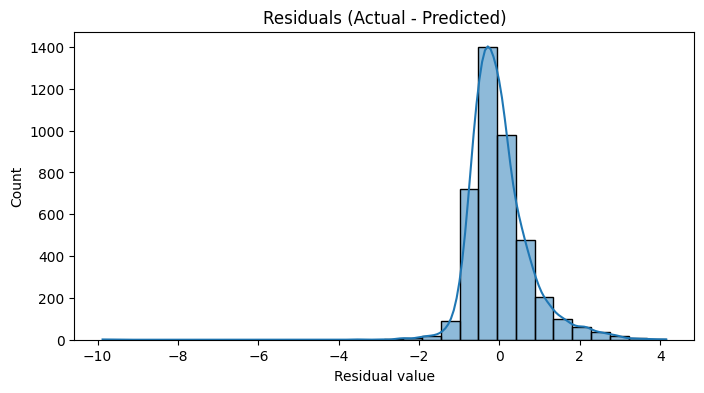

In [17]:

# 14) Plot residuals (errors) to see how predictions are distributed
residuals = y_test - y_pred
plt.figure(figsize=(8,4))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residuals (Actual - Predicted)")
plt.xlabel("Residual value")
plt.show()